1. K-Nearest Neighbors (K-NN)
==
El algoritmo (k-NN) es una forma de aprendizaje automático supervisado que se utiliza para predecir categorías, sklearn.neighbors proporciona funcionalidad para los métodos de aprendizaje basados en vecinos supervisados y sin supervisión. El aprendizaje supervisado basado en vecinos se presenta en dos tipos: 

>Clasificación para datos con etiquetas discretas

>Regresión para datos con etiquetas continúas.


Paso 1
==
Primero debemos importar las librerías a utilizar:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

Paso 2
==
De datasets importamos el conjunto de datos de iris() y establecemos el número de vecino más cercano en 15


In [ ]:
iris = datasets.load_iris()
n_neighbors = 15
iris

La librería Iris se encuentra separada en: 
    
>data que contiene todas las características.

>target que contiene las clases asociadas a esas características. 


In [ ]:
X = iris.data[:,:2] # solo tomaremos los primeros 2 features, para ejemplificar.
print(X)
y = iris.target
print(y)


Paso 4
==
Para analizar los datos visualmente crearemos un mapa de colores mediante ListedColormap a partir de una lista de colores, y utilizaremos un mallado con un paso de 0.2 


In [ ]:
h = .02  
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


Paso 5
==
Ahora realizaremos dos clasificaciones, una para un peso uniforme y otra para un peso en función al inverso de la distancia.


In [ ]:
# n_neighbors = 5
for weights in ['uniform', 'distance']:
    # Creamos una instancia del clasificador de vecinos más cercanos y le pasamos los datos mediante fit().
    # El primer párametro de KNeighborsClassifier es con cuantos vecinos quiero clasificar y el segundo el tipo de peso a utilizar.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Establecemos los límites del gráfico y asignamos un color a cada punto de malla.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Agregamos el resultado al gráfico
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, shading='auto', cmap=cmap_light)

    # Ploteo los datos de entrenamiento
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Clasificación (k = %i, weights = '%s')" % (n_neighbors, weights))
    
    #Ploteo un nuevo dato  
    Xn = np.array([[7.3,3], [5.1,2.9], [6.4,3.2]])
    Yn = clf.predict(Xn)
    print(Yn)
plt.show()



2.- Arboles de decisiones
==
Un árbol de decisiones se asemeja a las raíces de un árbol, en donde partimos de un conjunto de datos con determinadas características, que llamaremos raíz principal y que iremos descomponiendo por atributos, en ramas a partir de una determinada clasificación. Cada descomposición lleva asociada una condición que puede resultar verdadera o falsa y que se encuentra relacionada a una caracterización específica. 
Podríamos tener  por ejemplo el atributo “tipo de vehículo” con valores:
    
>Camionetas 

>Autos

Y el atributo “tracción”, con valores:
    
>Cuatro ruedas

>Dos ruedas


En base a estos atributos podríamos crear un árbol en el cual la primera división se realice por “tipo de vehículo” y luego por “tracción” o al revés. Esta división la realizaremos a partir de un algoritmo que optimice la forma en la cual se lleva a cabo la división en base a un análisis probabilístico.
Cuanto más profundo es el árbol, más complejas son las reglas de decisión y más se ajusta el modelo


In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
iris=load_iris()

In [5]:
X = iris.data[:,:2] # solo tomaremos los primeros 2 features, para ejemplificar.
Y = iris.target

In [6]:
X_entrenamiento, X_test, y_entrenamiento, y_test=train_test_split(X, Y)

In [7]:
arbol=DecisionTreeClassifier(max_depth=3)

In [8]:
arbol.fit(X_entrenamiento, y_entrenamiento)

DecisionTreeClassifier(max_depth=3)

In [9]:
arbol.score(X_test, y_test)

0.8157894736842105

In [10]:
arbol.score(X_entrenamiento, y_entrenamiento)

0.8125

In [ ]:
# import os
# Usuarios de Windows:
# os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'


In [12]:
export_graphviz(arbol, out_file='arbol1.dot', class_names=iris.target_names, feature_names=iris.feature_names[:2], impurity=False, filled=True)

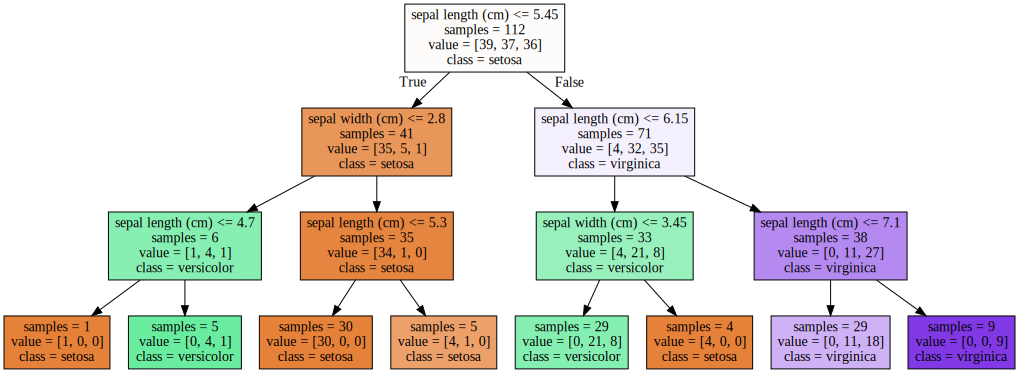

In [13]:
with open('arbol1.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)


In [14]:
from sklearn.tree import plot_tree

[Text(167.4, 190.26, 'X[0] <= 5.45\ngini = 0.666\nsamples = 112\nvalue = [39, 37, 36]'),
 Text(83.7, 135.9, 'X[1] <= 2.8\ngini = 0.256\nsamples = 41\nvalue = [35, 5, 1]'),
 Text(41.85, 81.53999999999999, 'X[0] <= 4.7\ngini = 0.5\nsamples = 6\nvalue = [1, 4, 1]'),
 Text(20.925, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 5.3\ngini = 0.056\nsamples = 35\nvalue = [34, 1, 0]'),
 Text(104.625, 27.180000000000007, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(146.475, 27.180000000000007, 'gini = 0.32\nsamples = 5\nvalue = [4, 1, 0]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 6.15\ngini = 0.551\nsamples = 71\nvalue = [4, 32, 35]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 3.45\ngini = 0.522\nsamples = 33\nvalue = [4, 21, 8]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.4\nsamples = 29\nvalue = [0, 21,

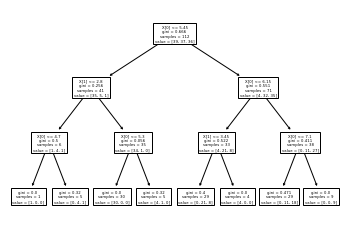

In [15]:
plot_tree(arbol)

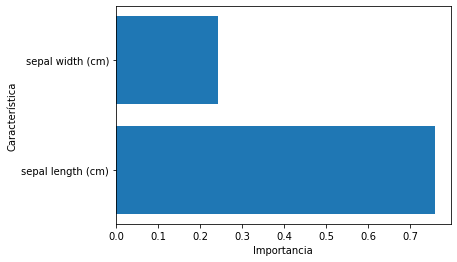

In [16]:
caracteristica=2

plt.barh(range(caracteristica),arbol.feature_importances_)
plt.yticks(np.arange(caracteristica),iris.feature_names[:2])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()


In [17]:
h = .02  
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

NameError: name 'y' is not defined

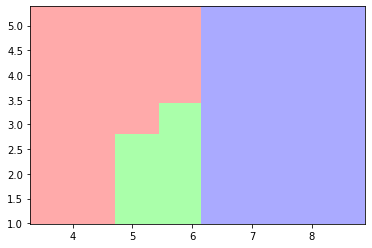

In [18]:
# Establecemos los límites del gráfico y asignamos un color a cada punto de malla.
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = arbol.predict(np.c_[xx.ravel(), yy.ravel()])

# Agregamos el resultado al gráfico
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, shading='auto', cmap=cmap_light)

# Ploteo los datos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision tree")
    
# #Ploteo un nuevo dato  
Xn = np.array([[7.3,3], [5.1,2.9], [6.4,3.2]])
Yn = arbol.predict(Xn)
print(Yn)
plt.show()
